In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
ONE_MAX_LENGHT = 100 # длина строки

In [3]:
POPULATION_SIZE = 200 # размер популяции
P_CROSSOVER = 0.9 # вер-ть кроссинговера
P_MUTATION = 0.1 # вер-ть мутации отдельной особи
MAX_GENERATION = 50 # кол-во поколений

In [4]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [5]:
class FitnessMax:
    def __init__(self):
        self.values = [0]

class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()

In [6]:
def one_max_fitness(ind):
    return sum(ind),

def individual_creater():
    return Individual([random.randint(0, 1) for _ in range(ONE_MAX_LENGHT)])

def population_creater(n=0):
    return list([individual_creater() for _ in range(n)])

In [7]:
population = population_creater(POPULATION_SIZE)
generation_counter = 0

In [10]:
for ind in population:
    ind.fitness.values = one_max_fitness(ind)

In [11]:
max_fitness_values = []
mean_fitness_values = []

In [12]:
def clone(values):
    ind = Individual(values[:])
    ind.fitness.values = values.fitness.values[:]
    return ind

In [13]:
def sel_tournament(population):
    p_len = len(population)
    offsprings = []
    for i in range(p_len):
        i1 = i2 = i3 = 0
        
        while i1 == i2 or i2 == i3 or i3 == i1:
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), random.randint(0, p_len-1)
            
        offsprings.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values[0]))
    return offsprings

In [14]:
def cx_one_point(parent1, parent2):
    s = random.randint(2, len(parent1)-3)
    parent1[s:], parent2[:s] = parent2[s:], parent1[:s]

In [15]:
def mutation(ind, p=0.01):
    for i in range(len(ind)):
        if random.random() < p:
            ind[i] ^= 1 

In [16]:
fitness_values = [ind.fitness.values[0] for ind in population]

In [17]:
while max(fitness_values) < ONE_MAX_LENGHT and generation_counter < MAX_GENERATION:
    generation_counter += 1
    
    offsptings = sel_tournament(population)
    offsptings = list(map(clone, offsptings))
    
    for parent1, parent2 in zip(offsptings[::2], offsptings[1::2]):
        if random.random() < P_CROSSOVER:
            cx_one_point(parent1, parent2)
    
    for ind in offsptings:
        if random.random() < P_CROSSOVER:
            mutation(ind, 1.0/ONE_MAX_LENGHT)
            
    for ind in offsptings:
        ind.fitness.values = one_max_fitness(ind)
        
    population = offsptings[:]
    
    fitness_values = [ind.fitness.values[0] for ind in population]
    
    print(f"Поколение {generation_counter}: Макс приспособ. = {max(fitness_values)}, Средняя приспособ.= {sum(fitness_values) / len(population)}")
    
    max_fitness_values.append(max(fitness_values))
    mean_fitness_values.append(sum(fitness_values) / len(population))

Поколение 1: Макс приспособ. = 62, Средняя приспособ.= 53.43
Поколение 2: Макс приспособ. = 63, Средняя приспособ.= 56.52
Поколение 3: Макс приспособ. = 66, Средняя приспособ.= 58.515
Поколение 4: Макс приспособ. = 67, Средняя приспособ.= 61.255
Поколение 5: Макс приспособ. = 71, Средняя приспособ.= 62.54
Поколение 6: Макс приспособ. = 74, Средняя приспособ.= 64.7
Поколение 7: Макс приспособ. = 73, Средняя приспособ.= 67.025
Поколение 8: Макс приспособ. = 75, Средняя приспособ.= 69.205
Поколение 9: Макс приспособ. = 77, Средняя приспособ.= 70.555
Поколение 10: Макс приспособ. = 77, Средняя приспособ.= 71.71
Поколение 11: Макс приспособ. = 78, Средняя приспособ.= 72.96
Поколение 12: Макс приспособ. = 79, Средняя приспособ.= 74.025
Поколение 13: Макс приспособ. = 82, Средняя приспособ.= 75.65
Поколение 14: Макс приспособ. = 82, Средняя приспособ.= 77.045
Поколение 15: Макс приспособ. = 83, Средняя приспособ.= 78.455
Поколение 16: Макс приспособ. = 85, Средняя приспособ.= 79.615
Поколение

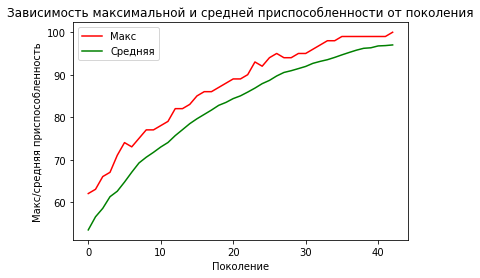

In [18]:
plt.plot(max_fitness_values, color='red')
plt.plot(mean_fitness_values, color='green')
plt.legend(['Макс', 'Cредняя'])
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()